In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8665,45,technician,single,secondary,no,1044,yes,no,unknown,3,jun,239,8,-1,0,unknown,no
28611,57,technician,divorced,secondary,no,77,yes,yes,cellular,29,jan,168,3,246,2,failure,no
24263,39,blue-collar,married,primary,no,108,no,no,cellular,17,nov,265,1,-1,0,unknown,no
20571,30,management,single,tertiary,no,812,no,no,cellular,12,aug,91,4,-1,0,unknown,no
39976,39,admin.,married,secondary,no,150,no,no,cellular,3,jun,296,4,-1,0,unknown,yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df.duplicated().any()

False

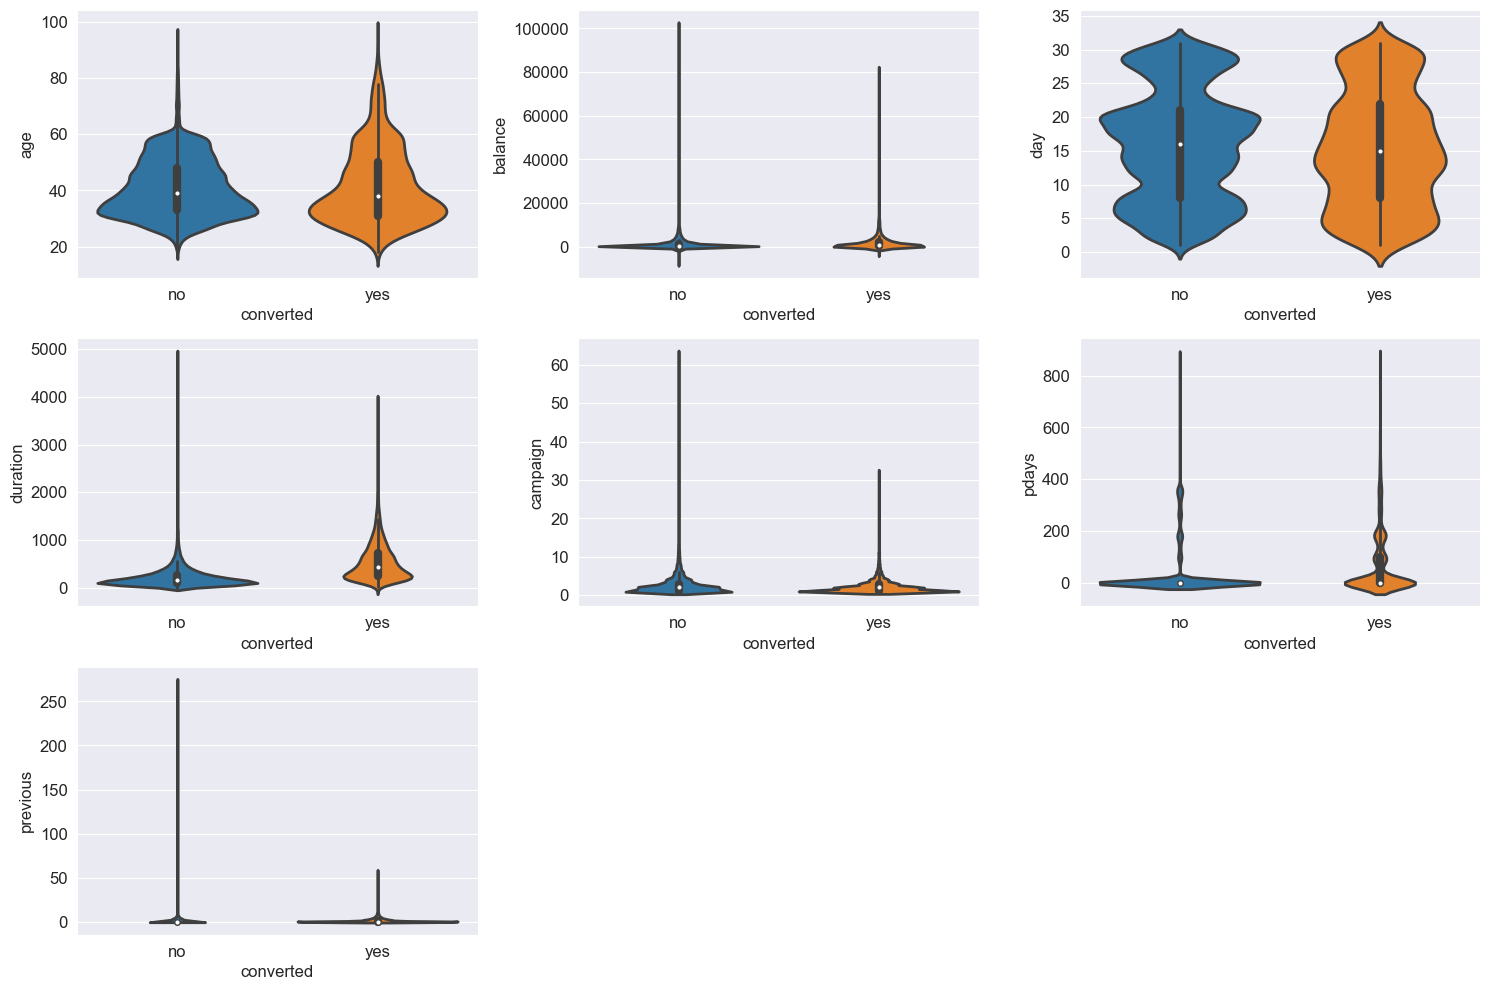

In [67]:
cats = df.select_dtypes(include = ['object']).columns
nums = df.select_dtypes(include = ['int64', 'float64']).columns

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 10))
for i in range(len(nums)):
    sns.violinplot(y = df[nums[i]], x = df['y'], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), linewidth = 2)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel = nums[i], fontsize=12)
    plt.xlabel(xlabel = 'converted', fontsize=12)
    plt.tight_layout()

In [62]:
nums

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [68]:
for i in nums:
    if (df[i] < 0).any():
        df[i] = df.apply(lambda x : int(0) if int(x[i]) < 0 else x[i], axis = 1)
    print(f"Total negative value of {i}:", (df[i] < 0).sum())

Total negative value of age: 0
Total negative value of balance: 0
Total negative value of day: 0
Total negative value of duration: 0
Total negative value of campaign: 0
Total negative value of pdays: 0
Total negative value of previous: 0


In [69]:
from sklearn.preprocessing import MinMaxScaler

col_norm = list()
for i in nums:
    if i not in ['age', 'day']:
        df[f"{i}_norm"] = MinMaxScaler().fit_transform(np.log(df[i] + (df[df[i] > 0][i].min() / 2)).values.reshape(len(df), 1))
        col_norm.append(f"{i}_norm")

In [70]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,balance_norm,duration_norm,campaign_norm,pdays_norm,previous_norm
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1388.734069,15.806419,258.163080,2.763841,41.015195,0.580323,0.481926,0.637396,0.148923,0.145047,0.050637
std,10.618762,3029.530442,8.322476,257.527812,3.098021,99.792615,2.303441,0.245936,0.100926,0.157658,0.309712,0.115276
min,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.407024,0.580028,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.556063,0.640520,0.136381,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.650809,0.702629,0.226213,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000


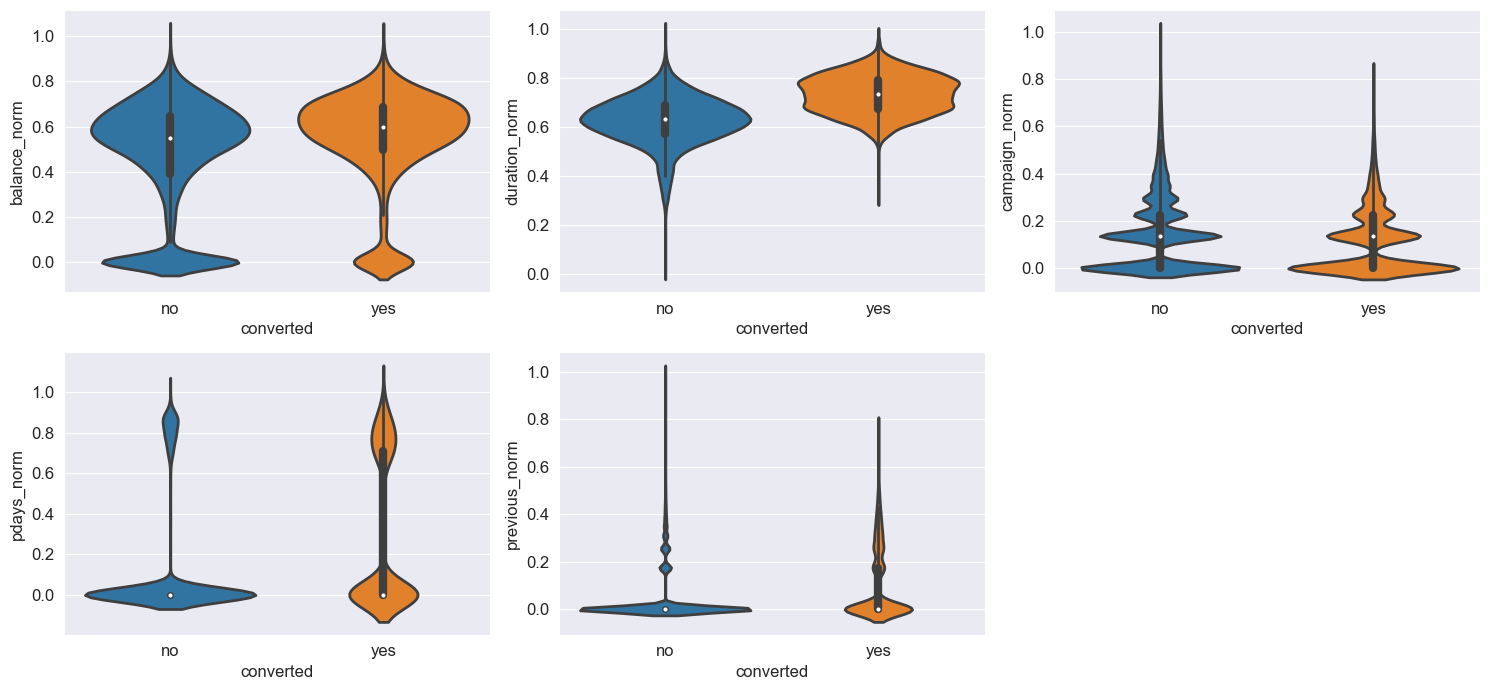

In [74]:
fig = plt.figure(figsize=(15, 7))
for i in range(len(col_norm)):
    sns.violinplot(y = df[col_norm[i]], x = df['y'], ax = fig.add_subplot(math.ceil(len(col_norm)/3),3, i+1), linewidth = 2)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel = col_norm[i], fontsize=12)
    plt.xlabel(xlabel = 'converted', fontsize=12)
    plt.tight_layout()

In [165]:
cats

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [224]:
for i in cats:
    print(f"Category {i}:", df[i].unique())

Category job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Category marital: ['married' 'single' 'divorced']
Category education: ['tertiary' 'secondary' 'unknown' 'primary']
Category default: ['no' 'yes']
Category housing: ['yes' 'no']
Category loan: ['no' 'yes']
Category contact: ['unknown' 'cellular' 'telephone']
Category month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Category poutcome: ['unknown' 'failure' 'other' 'success']
Category y: ['no' 'yes']


In [6]:
df['education_mapped'] = df['education'].map({'primary' : 0,
                                              'secondary' : 1,
                                              'tertiary' : 2,
                                              'unknown' : 3})

df['is_default'] = df['default'].map({'no' : 0,
                                      'yes' : 1})

df['is_housing'] = df['housing'].map({'no' : 0,
                                      'yes' : 1})

df['is_loan'] = df['loan'].map({'no' : 0,
                                'yes' : 1})

df['month_mapped'] = df['month'].map({'jan' : 0,
                                   'feb' : 1,
                                   'mar' : 2,
                                   'apr' : 3,
                                   'may' : 4,
                                   'jun' : 5,
                                   'jul' : 6,
                                   'aug' : 7,
                                   'sep' : 8,
                                   'oct' : 9,
                                   'nov' : 10,
                                   'dec' : 11})

df['y'] = df['y'].map({'no' : 0,
                       'yes' : 1})

df['age_cat'] = df['age'].apply(lambda x : 'young_adult' if x <= 30 else 'middle_aged_adult'\
                               if (x > 30) and (x <= 45) else 'old_aged_adult')

In [7]:
for i in cats | ['age_cat']:
    if i in ['job', 'marital', 'contact', 'age_cat']:
        df = pd.concat([df, pd.get_dummies(df[i], prefix = i)], axis = 1)

In [8]:
df = df.drop(columns = [i for i in cats | ['age_cat'] if i not in ['y']])
df = df.drop(columns = [i for i in nums if i not in ['day']])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        45211 non-null  int64  
 1   y                          45211 non-null  int64  
 2   balance_norm               45211 non-null  float64
 3   duration_norm              45211 non-null  float64
 4   campaign_norm              45211 non-null  float64
 5   pdays_norm                 45211 non-null  float64
 6   previous_norm              45211 non-null  float64
 7   education_mapped           45211 non-null  int64  
 8   is_default                 45211 non-null  int64  
 9   is_housing                 45211 non-null  int64  
 10  is_loan                    45211 non-null  int64  
 11  month_mapped               45211 non-null  int64  
 12  age_cat_middle_aged_adult  45211 non-null  uint8  
 13  age_cat_old_aged_adult     45211 non-null  uin

In [72]:
df.sample(2)

,day,y,balance_norm,duration_norm,campaign_norm,pdays_norm,previous_norm,education_mapped,is_default,is_housing,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
18390,31,0,0.719498,0.595662,0.136381,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
22342,22,0,0.327741,0.477974,0.136381,0.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


<Axes: >

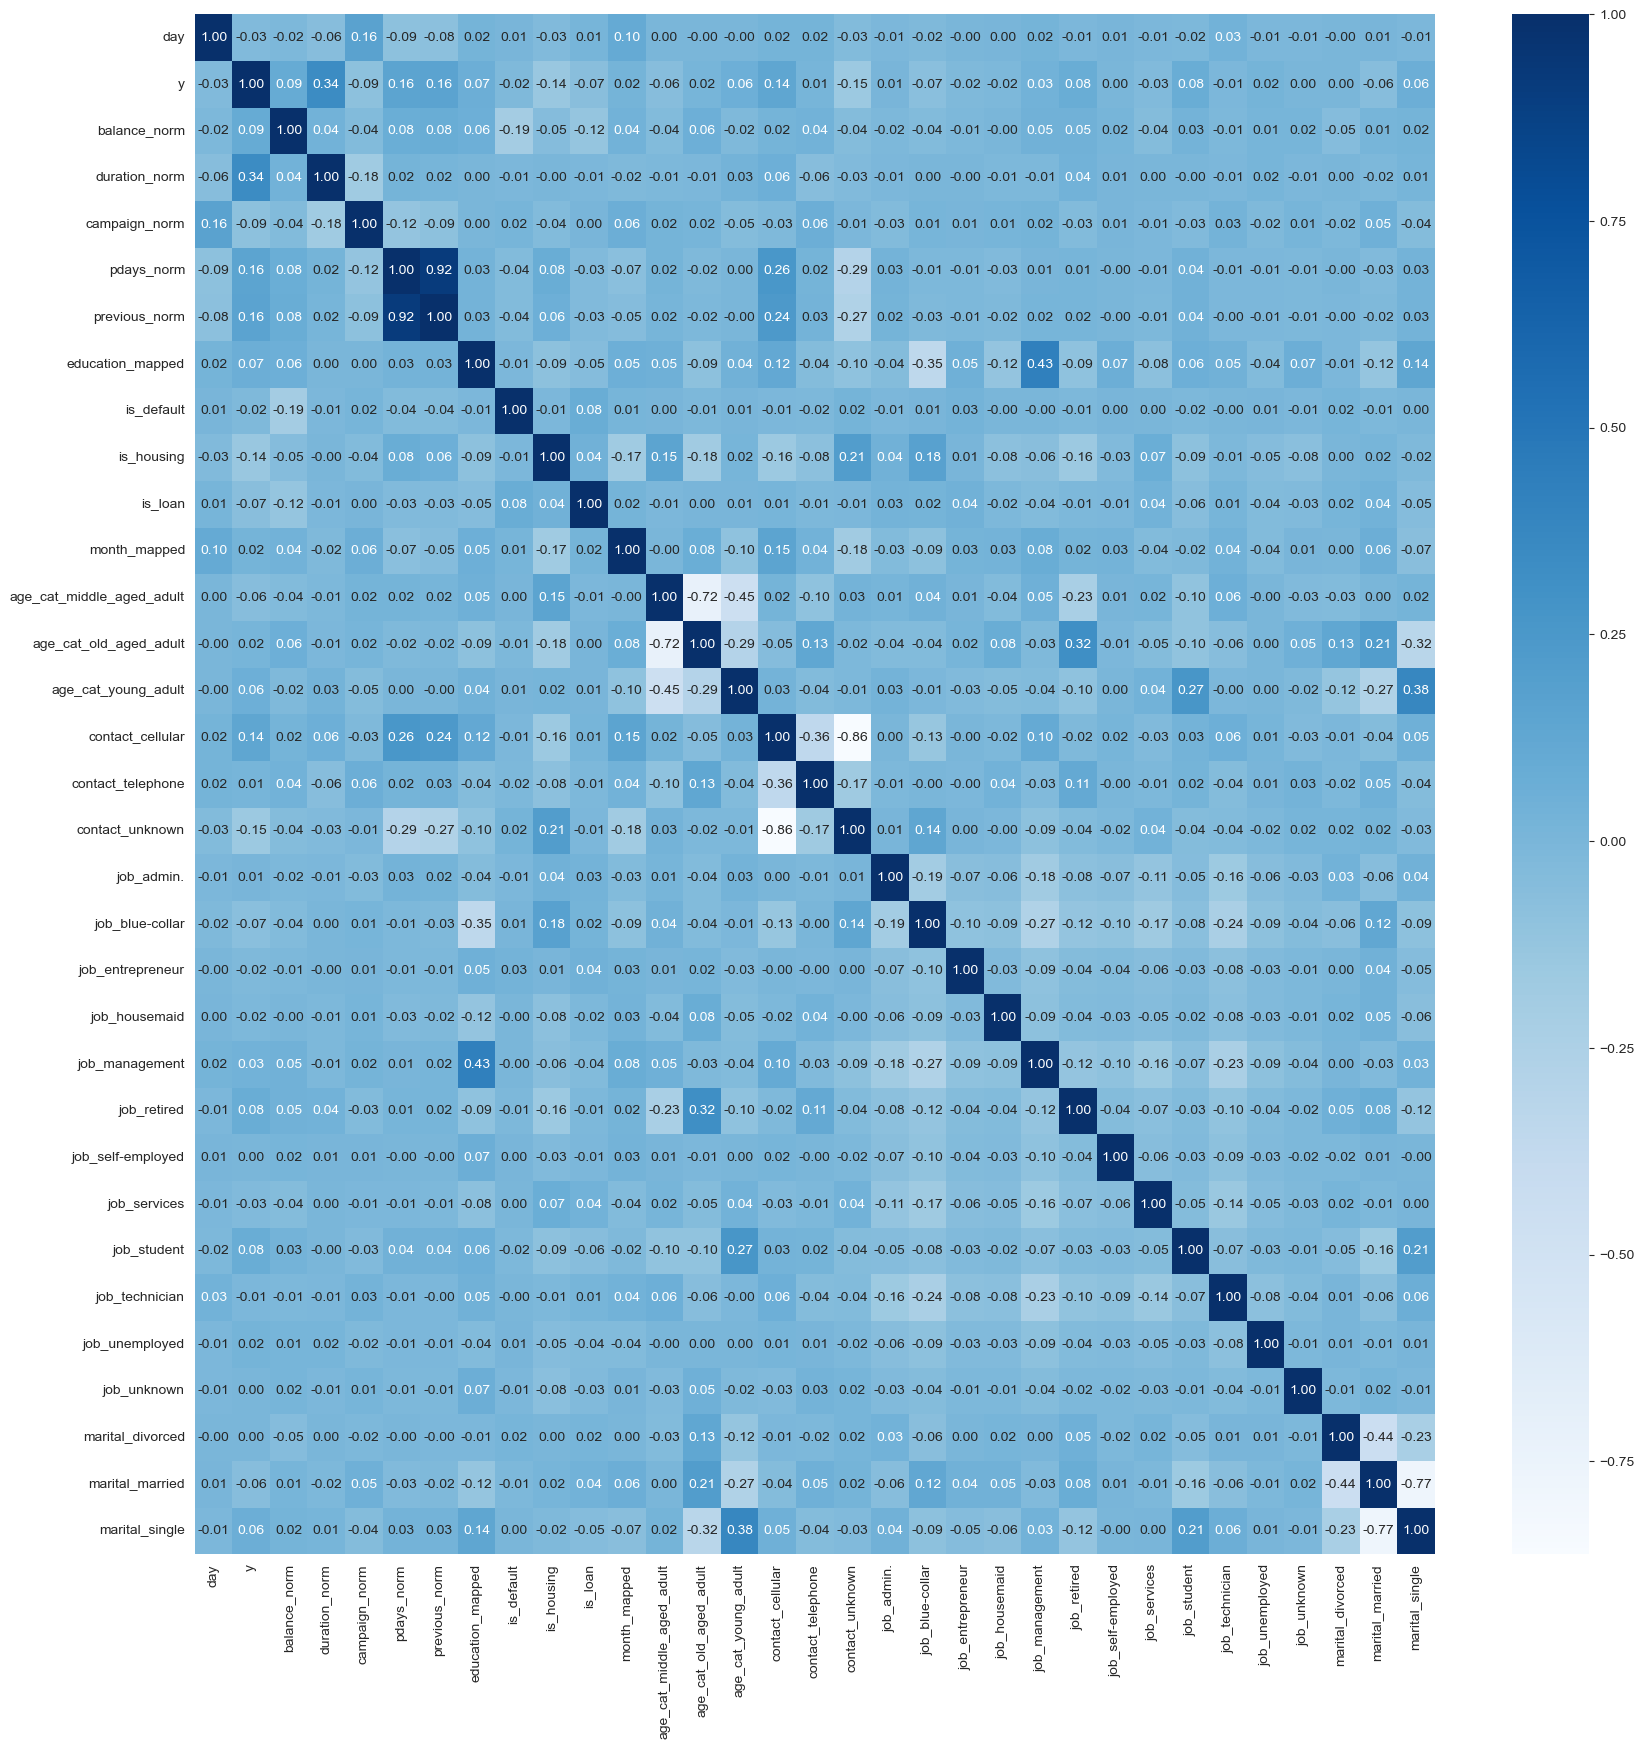

In [60]:
fig = plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f', ax = fig.add_subplot(1,1, 1))

In [20]:
X = df.drop(columns=['duration_norm', 'day', 'month_mapped', 'y'])
y = df[['y']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
df.columns

Index(['day', 'y', 'balance_norm', 'duration_norm', 'campaign_norm',
       'pdays_norm', 'previous_norm', 'education_mapped', 'is_default',
       'is_housing', 'is_loan', 'month_mapped', 'age_cat_middle_aged_adult',
       'age_cat_old_aged_adult', 'age_cat_young_adult', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')

In [21]:
from scipy import stats

X = pd.concat([X_train, y_train], axis = 1)

print("Before removing outlier: ", len(X))

for i in col_norm:
    if i not in ['duration_norm']:
        z_scores = np.abs(stats.zscore(X[i]))
        X = X[z_scores <= 3]

print("After removing outlier: ", len(X))

X_train = X.drop(columns=['y'])
y_train = X[['y']]

Before removing outlier:  31647
After removing outlier:  30474


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

def eval_classification():
    n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
    criterion = ['gini', 'entropy']
    max_depth = [int(x) for x in np.linspace(2, 100, 50)]
    min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
    min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
    
    hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                           min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    list_model = {'Random Forest' : RandomizedSearchCV(RandomForestClassifier(random_state=1), hyperparameters, scoring='roc_auc', cv=5),
                 'AdaBoost Classifier' : AdaBoostClassifier(random_state=1),
                 'XGBoost Classifier' : XGBClassifier(random_state=1)}
    
    for key, val in list_model.items():
        model = val
        model.fit(X_train_over, y_train_over)
    
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        print(key, "Evaluation Result")
        print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
        print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
        print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
        print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
        print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
        print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
        print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
        print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

        print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
        print("")

def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

In [27]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [23]:
from imblearn import over_sampling
X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)

In [24]:
len(X_train), len(y_train), len(X_test), len(y_test), len(X_train_over), len(y_train_over)

(30474, 30474, 13564, 13564, 40416, 40416)

In [57]:
eval_classification()

Random Forest Evaluation Result
Accuracy (Train Set): 0.90
Accuracy (Test Set): 0.86
Precision (Train Set): 0.57
Precision (Test Set): 0.37
Recall (Train Set): 0.46
Recall (Test Set): 0.33
F1-Score (Train Set): 0.51
F1-Score (Test Set): 0.35
roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.74

AdaBoost Classifier Evaluation Result
Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.86
Precision (Train Set): 0.37
Precision (Test Set): 0.38
Recall (Train Set): 0.30
Recall (Test Set): 0.33
F1-Score (Train Set): 0.33
F1-Score (Test Set): 0.36
roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.74

XGBoost Classifier Evaluation Result
Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.87
Precision (Train Set): 0.55
Precision (Test Set): 0.40
Recall (Train Set): 0.39
Recall (Test Set): 0.30
F1-Score (Train Set): 0.45
F1-Score (Test Set): 0.34
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.73



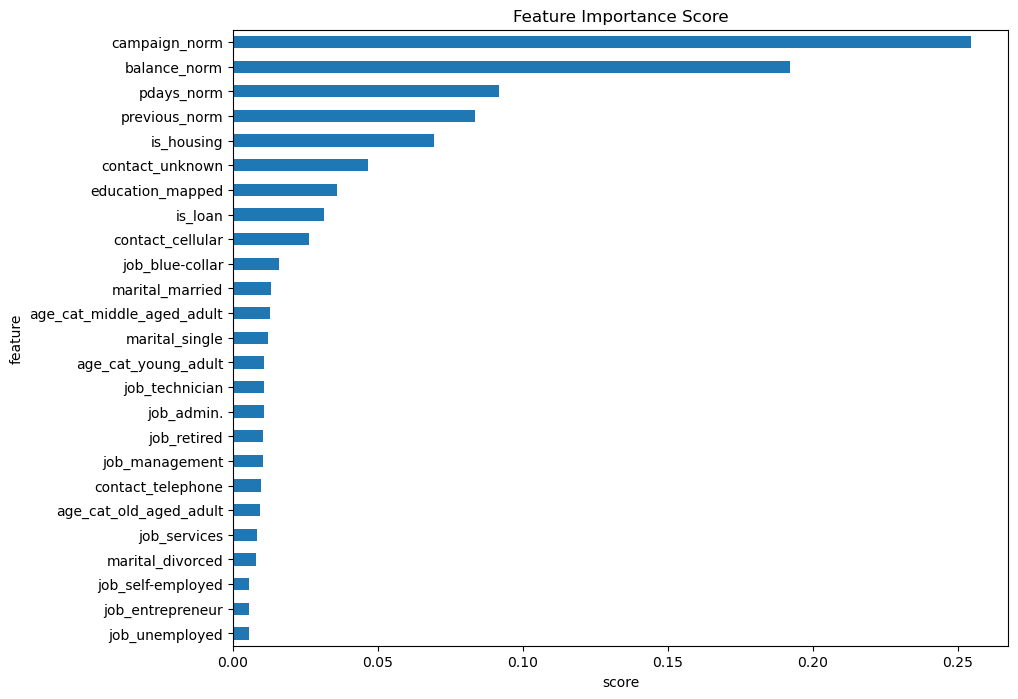

In [64]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
    
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rs = RandomizedSearchCV(RandomForestClassifier(random_state=1), hyperparameters, scoring='roc_auc', cv=5)
rs.fit(X_train_over, y_train_over)

show_feature_importance(rs)

In [ ]:
import shap

explainer = shap.TreeExplainer(rs)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)